In [64]:
import pandas as pd
import dask.dataframe as dd
import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
from glob import glob
import numpy as np
from datetime import datetime

In [2]:
#accessing geocoding service nominatim
locator = Nominatim(user_agent="myGeocoder")

In [3]:
#keeping only relevant columns
locations=pd.read_excel("Centers.xlsx",skiprows=1).iloc[:,3:].dropna()



In [4]:
#joining relevant columns to make a single address
locations["address"] = locations['Address'].astype(str) +","+ locations["City"]+","+ locations["ST/PR"]+","+ locations["ZIP"].astype(str)+","+ locations["Country"]
#keeping only relevant columns
cleaned_file=locations.iloc[:, lambda df: [0, 6]]

In [5]:
cleaned_file

,Location Name,address
1,Allegiance Trucks,"130 Market St,Fort Kent,ME,4743,US"
2,Allegiance Trucks,"571 Coldbrook Rd,Hermon,ME,4401,US"
3,"Bergey's Trucks, Inc.","7255 N Crescent Blvd,Pennsauken,NJ,8110,US"
4,Brody Transportation,"621 S Bentalou St,Baltimore,MD,21223,US"
6,Excel Trailer / Truck Location,"405 Lee Hwy,Roanoke,VA,24019,US"
...,...,...
72,Wick's Truck Trailers Inc.,"10580 S 147th St,Omaha,NE,68138,US"
73,Wick's Truck Trailers Inc.,"2135 Old Rte 66,Strafford,MO,65757,US"
74,Wick's Truck Trailers Inc.,"4400 Dakota Ave,South Sioux City,NE,68776,US"
76,WTS Services LLC,"3217 Alton Park Blvd,Chattanooga,TN,37410,US"


In [6]:

from geopy.extra.rate_limiter import RateLimiter

# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
# 2- - create location column
cleaned_file['location'] = cleaned_file.loc[:,('address')].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
cleaned_file['point'] = cleaned_file.loc[:,('location')].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
cleaned_file[['latitude', 'longitude','altitude']] = pd.DataFrame(cleaned_file['point'].tolist(), index=cleaned_file.index)

C:\Users\asoka\AppData\Local\Temp\ipykernel_15300\2456454351.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_file['location'] = cleaned_file.loc[:,('address')].apply(geocode)
C:\Users\asoka\AppData\Local\Temp\ipykernel_15300\2456454351.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_file['point'] = cleaned_file.loc[:,('location')].apply(lambda loc: tuple(loc.point) if loc else None)
C:\Users\asoka\AppData\Local\Temp\ipykernel_15300\2456454351.py:10: SettingWithCopyWarning: 
A value i

In [7]:
distribution_center=cleaned_file.dropna()
#removing nans
distribution_center

,Location Name,address,location,point,latitude,longitude,altitude
1,Allegiance Trucks,"130 Market St,Fort Kent,ME,4743,US","(130, Market Street, Bradburys, Fort Kent Mill...","(47.25025565990624, -68.57855667893905, 0.0)",47.250256,-68.578557,0.0
2,Allegiance Trucks,"571 Coldbrook Rd,Hermon,ME,4401,US","(571, Coldbrook Road, Cold Brook, Hermon, Peno...","(44.77943625091508, -68.86812040739302, 0.0)",44.779436,-68.868120,0.0
3,"Bergey's Trucks, Inc.","7255 N Crescent Blvd,Pennsauken,NJ,8110,US","(7255, North Crescent Boulevard, Morrisville, ...","(39.9678731632653, -75.046089, 0.0)",39.967873,-75.046089,0.0
4,Brody Transportation,"621 S Bentalou St,Baltimore,MD,21223,US","(621, South Bentalou Street, Carrollton Ridge,...","(39.27943625, -76.65073530397436, 0.0)",39.279436,-76.650735,0.0
6,Excel Trailer / Truck Location,"405 Lee Hwy,Roanoke,VA,24019,US","(Lee Highway, Waterfall Lake, Hollins, Roanoke...","(37.3559095, -79.9294899, 0.0)",37.355910,-79.929490,0.0
7,Excel Trailer,"3243 Lee Hwy,Weyers Cave,VA,24019,US","(3243, Lee Highway, Fort Defiance, Weyers Cave...","(38.284332, -78.93612631295716, 0.0)",38.284332,-78.936126,0.0
8,Excel Trailer,"901 W Hundred Rd,Chester,VA,23836,US","(West Hundred Road, Dutch Gap, Chester, Cheste...","(37.3546415, -77.4049353, 0.0)",37.354641,-77.404935,0.0
10,Fleetco Inc.,"3003 Brick Church Pike,Nashville,TN,37207,US","(Brick Church Pike, Nashville-Davidson, Davids...","(36.2368959, -86.7811476, 0.0)",36.236896,-86.781148,0.0
16,Fleetstop Trailers Ltd.,"1650 Oak Point Hwy,Winnipeg,MB,R3C 2E6,CA","(Oak Point Highway, Tyndall Park, Winnipeg, Ma...","(49.9296508, -97.2087688, 0.0)",49.929651,-97.208769,0.0
18,Gulf City Body & Trailer Works,"601 S Conception St,Mobile,AL,36603,US","(601, South Conception Street, Church Street H...","(30.677797, -88.042805, 0.0)",30.677797,-88.042805,0.0


In [8]:
#renaming column name
distribution_center = distribution_center.rename(columns={'Location Name': 'loc_name'})
distribution_center

,loc_name,address,location,point,latitude,longitude,altitude
1,Allegiance Trucks,"130 Market St,Fort Kent,ME,4743,US","(130, Market Street, Bradburys, Fort Kent Mill...","(47.25025565990624, -68.57855667893905, 0.0)",47.250256,-68.578557,0.0
2,Allegiance Trucks,"571 Coldbrook Rd,Hermon,ME,4401,US","(571, Coldbrook Road, Cold Brook, Hermon, Peno...","(44.77943625091508, -68.86812040739302, 0.0)",44.779436,-68.868120,0.0
3,"Bergey's Trucks, Inc.","7255 N Crescent Blvd,Pennsauken,NJ,8110,US","(7255, North Crescent Boulevard, Morrisville, ...","(39.9678731632653, -75.046089, 0.0)",39.967873,-75.046089,0.0
4,Brody Transportation,"621 S Bentalou St,Baltimore,MD,21223,US","(621, South Bentalou Street, Carrollton Ridge,...","(39.27943625, -76.65073530397436, 0.0)",39.279436,-76.650735,0.0
6,Excel Trailer / Truck Location,"405 Lee Hwy,Roanoke,VA,24019,US","(Lee Highway, Waterfall Lake, Hollins, Roanoke...","(37.3559095, -79.9294899, 0.0)",37.355910,-79.929490,0.0
7,Excel Trailer,"3243 Lee Hwy,Weyers Cave,VA,24019,US","(3243, Lee Highway, Fort Defiance, Weyers Cave...","(38.284332, -78.93612631295716, 0.0)",38.284332,-78.936126,0.0
8,Excel Trailer,"901 W Hundred Rd,Chester,VA,23836,US","(West Hundred Road, Dutch Gap, Chester, Cheste...","(37.3546415, -77.4049353, 0.0)",37.354641,-77.404935,0.0
10,Fleetco Inc.,"3003 Brick Church Pike,Nashville,TN,37207,US","(Brick Church Pike, Nashville-Davidson, Davids...","(36.2368959, -86.7811476, 0.0)",36.236896,-86.781148,0.0
16,Fleetstop Trailers Ltd.,"1650 Oak Point Hwy,Winnipeg,MB,R3C 2E6,CA","(Oak Point Highway, Tyndall Park, Winnipeg, Ma...","(49.9296508, -97.2087688, 0.0)",49.929651,-97.208769,0.0
18,Gulf City Body & Trailer Works,"601 S Conception St,Mobile,AL,36603,US","(601, South Conception Street, Church Street H...","(30.677797, -88.042805, 0.0)",30.677797,-88.042805,0.0


In [33]:
#reading CSV through Dask
wabash_2019= dd.read_csv('Wabash data/*.csv',dtype=str,usecols = ["messageDate", "latitude", "longitude", "deviceId"])
wabash_2019

,deviceId,latitude,longitude,messageDate
npartitions=287,,,,
,object,object,object,object
,...,...,...,...
...,...,...,...,...
,...,...,...,...
,...,...,...,...


In [34]:
#dask to pandas dataframe
wabash_pandas=wabash_2019.compute()

In [35]:
#keeping required columns
wabash_pandas = wabash_pandas[["messageDate", "latitude", "longitude", "deviceId"]]
wabash_pandas = wabash_pandas[wabash_pandas["deviceId"].str.contains("deviceId")==False]
wabash_pandas = wabash_pandas.reset_index()
wabash_pandas = wabash_pandas.drop(columns = ["index"])

In [36]:
#removing duplicates
wabash_pandas = wabash_pandas.drop_duplicates()
#removing nans
wabash_pandas = wabash_pandas.dropna()

In [37]:
wabash_pandas

,messageDate,latitude,longitude,deviceId
0,2019/01/01 15:58:59.000,34.63165,-92.46719,232036594
1,2019/01/01 15:58:46.000,48.22362,-101.34933,232051331
2,2019/01/01 15:58:21.000,42.20548,-85.91394,232194398
3,2019/01/01 15:58:00.000,25.88897,-100.26475,232194894
4,2019/01/01 15:57:49.000,41.14845,-77.35425,805697814
...,...,...,...,...
37794632,2021/10/30 17:00:01.000,42.73959833333333,-81.4262925,839009916
37794633,2021/10/30 17:00:01.000,35.532771,-108.631418,858118003
37794634,2021/10/30 17:00:01.000,39.9937765,-78.23552616666667,853575519
37794635,2021/10/30 17:00:01.000,29.784379833333332,-95.49612066666667,858117647


In [38]:
wabash_pandas["latitude"] = wabash_pandas["latitude"].astype(float)
wabash_pandas["longitude"] = wabash_pandas["longitude"].astype(float)
wabash_pandas["deviceId"] = wabash_pandas["deviceId"].astype(float).astype(int)
wabash_pandas["messageDate"] = pd.to_datetime(wabash_pandas["messageDate"], format = "%Y-%m-%d %H:%M:%S")
# Create year, month, day columns. Will use these to filter later on
wabash_pandas['year']=wabash_pandas['messageDate'].apply(lambda x: x.year)
wabash_pandas['month']=wabash_pandas['messageDate'].apply(lambda x: x.month)
wabash_pandas['day']=wabash_pandas['messageDate'].apply(lambda x: x.day)


In [39]:
# Not all trucks record locations at the same point in time.  
# Take the last recorded postition per day for each mcu. 
wabash_pandas2=pd.DataFrame(wabash_pandas.groupby(['year', 'month', 'day','deviceId'])['messageDate'].max())
wabash_pandas2.reset_index(inplace=True)

# Merge the two lists
wabash_pandas3=pd.merge(wabash_pandas2,wabash_pandas,left_on=['year', 'month', 'day','deviceId', 'messageDate'],
             right_on=['year', 'month', 'day','deviceId', 'messageDate'])

In [40]:
#printing to check
wabash_pandas3


,year,month,day,deviceId,messageDate,latitude,longitude
0,2018,12,31,-2147483648,2018-12-31 23:52:52,33.582190,-96.607200
1,2018,12,31,206672390,2018-12-31 18:40:09,32.464440,-96.839590
2,2018,12,31,206676916,2018-12-31 16:46:00,32.102160,-82.453620
3,2018,12,31,206676919,2018-12-31 17:06:00,25.450310,-80.479040
4,2018,12,31,206677007,2018-12-31 21:47:00,31.171330,-85.089480
...,...,...,...,...,...,...,...
1154547,2021,10,31,866520623,2021-10-31 04:00:31,33.536081,-86.870185
1154548,2021,10,31,866520684,2021-10-31 04:00:31,32.423810,-86.875661
1154549,2021,10,31,866520687,2021-10-31 04:00:31,33.324112,-87.025076
1154550,2021,10,31,2146626536,2021-10-31 03:00:33,35.415431,-97.645931


In [21]:
# #this variable acts as the boundary parameter which decides the geofence.
# x=0.00100
# # Creating a geofence.

# wabash_pandas3['win_wl'] = np.where((wabash_pandas3.latitude < 40.504293) # North border --
#                           & (wabash_pandas3.latitude > 40.298291) # South border
#                           & (wabash_pandas3.longitude > -87.008077) # North border
#                           & (wabash_pandas3.longitude < -86.730314) # south border
#                           ,1, # assigns 1 to all ping w/in the designated box
#                           0 # assigns 0 to all properties outside of box

# )
# wabash_pandas3.win_wl.value_counts()

0    157752
1       683
Name: win_wl, dtype: int64

In [66]:
# distribution_center.reset_index(inplace=True)

In [41]:
distribution_center

,loc_name,address,location,point,latitude,longitude,altitude,truck_count
1,Allegiance Trucks,"130 Market St,Fort Kent,ME,4743,US","(130, Market Street, Bradburys, Fort Kent Mill...","(47.25025565990624, -68.57855667893905, 0.0)",47.250256,-68.578557,0.0,0.0
2,Allegiance Trucks,"571 Coldbrook Rd,Hermon,ME,4401,US","(571, Coldbrook Road, Cold Brook, Hermon, Peno...","(44.77943625091508, -68.86812040739302, 0.0)",44.779436,-68.868120,0.0,4.0
3,"Bergey's Trucks, Inc.","7255 N Crescent Blvd,Pennsauken,NJ,8110,US","(7255, North Crescent Boulevard, Morrisville, ...","(39.9678731632653, -75.046089, 0.0)",39.967873,-75.046089,0.0,35.0
4,Brody Transportation,"621 S Bentalou St,Baltimore,MD,21223,US","(621, South Bentalou Street, Carrollton Ridge,...","(39.27943625, -76.65073530397436, 0.0)",39.279436,-76.650735,0.0,293.0
6,Excel Trailer / Truck Location,"405 Lee Hwy,Roanoke,VA,24019,US","(Lee Highway, Waterfall Lake, Hollins, Roanoke...","(37.3559095, -79.9294899, 0.0)",37.355910,-79.929490,0.0,494.0
7,Excel Trailer,"3243 Lee Hwy,Weyers Cave,VA,24019,US","(3243, Lee Highway, Fort Defiance, Weyers Cave...","(38.284332, -78.93612631295716, 0.0)",38.284332,-78.936126,0.0,1050.0
8,Excel Trailer,"901 W Hundred Rd,Chester,VA,23836,US","(West Hundred Road, Dutch Gap, Chester, Cheste...","(37.3546415, -77.4049353, 0.0)",37.354641,-77.404935,0.0,284.0
10,Fleetco Inc.,"3003 Brick Church Pike,Nashville,TN,37207,US","(Brick Church Pike, Nashville-Davidson, Davids...","(36.2368959, -86.7811476, 0.0)",36.236896,-86.781148,0.0,2251.0
16,Fleetstop Trailers Ltd.,"1650 Oak Point Hwy,Winnipeg,MB,R3C 2E6,CA","(Oak Point Highway, Tyndall Park, Winnipeg, Ma...","(49.9296508, -97.2087688, 0.0)",49.929651,-97.208769,0.0,2514.0
18,Gulf City Body & Trailer Works,"601 S Conception St,Mobile,AL,36603,US","(601, South Conception Street, Church Street H...","(30.677797, -88.042805, 0.0)",30.677797,-88.042805,0.0,204.0


In [42]:
distribution_center.index

Int64Index([ 1,  2,  3,  4,  6,  7,  8, 10, 16, 18, 19, 24, 26, 28, 30, 31, 32,
            34, 35, 36, 38, 39, 40, 41, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53,
            54, 55, 57, 58, 59, 60, 61, 62, 63, 65, 67, 68, 69, 72, 74, 76],
           dtype='int64')

In [43]:

x=0.00100
distribution_center["truck_count"] = np.nan
distribution_center

,loc_name,address,location,point,latitude,longitude,altitude,truck_count
1,Allegiance Trucks,"130 Market St,Fort Kent,ME,4743,US","(130, Market Street, Bradburys, Fort Kent Mill...","(47.25025565990624, -68.57855667893905, 0.0)",47.250256,-68.578557,0.0,NaN
2,Allegiance Trucks,"571 Coldbrook Rd,Hermon,ME,4401,US","(571, Coldbrook Road, Cold Brook, Hermon, Peno...","(44.77943625091508, -68.86812040739302, 0.0)",44.779436,-68.868120,0.0,NaN
3,"Bergey's Trucks, Inc.","7255 N Crescent Blvd,Pennsauken,NJ,8110,US","(7255, North Crescent Boulevard, Morrisville, ...","(39.9678731632653, -75.046089, 0.0)",39.967873,-75.046089,0.0,NaN
4,Brody Transportation,"621 S Bentalou St,Baltimore,MD,21223,US","(621, South Bentalou Street, Carrollton Ridge,...","(39.27943625, -76.65073530397436, 0.0)",39.279436,-76.650735,0.0,NaN
6,Excel Trailer / Truck Location,"405 Lee Hwy,Roanoke,VA,24019,US","(Lee Highway, Waterfall Lake, Hollins, Roanoke...","(37.3559095, -79.9294899, 0.0)",37.355910,-79.929490,0.0,NaN
7,Excel Trailer,"3243 Lee Hwy,Weyers Cave,VA,24019,US","(3243, Lee Highway, Fort Defiance, Weyers Cave...","(38.284332, -78.93612631295716, 0.0)",38.284332,-78.936126,0.0,NaN
8,Excel Trailer,"901 W Hundred Rd,Chester,VA,23836,US","(West Hundred Road, Dutch Gap, Chester, Cheste...","(37.3546415, -77.4049353, 0.0)",37.354641,-77.404935,0.0,NaN
10,Fleetco Inc.,"3003 Brick Church Pike,Nashville,TN,37207,US","(Brick Church Pike, Nashville-Davidson, Davids...","(36.2368959, -86.7811476, 0.0)",36.236896,-86.781148,0.0,NaN
16,Fleetstop Trailers Ltd.,"1650 Oak Point Hwy,Winnipeg,MB,R3C 2E6,CA","(Oak Point Highway, Tyndall Park, Winnipeg, Ma...","(49.9296508, -97.2087688, 0.0)",49.929651,-97.208769,0.0,NaN
18,Gulf City Body & Trailer Works,"601 S Conception St,Mobile,AL,36603,US","(601, South Conception Street, Church Street H...","(30.677797, -88.042805, 0.0)",30.677797,-88.042805,0.0,NaN


Allegiance Trucks


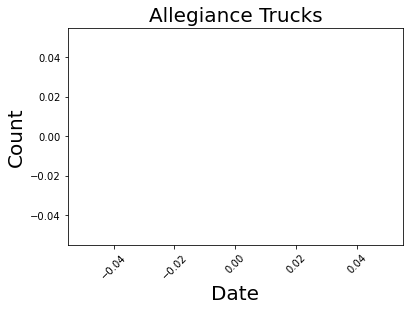

Allegiance Trucks


C:\Users\asoka\AppData\Local\Temp\ipykernel_15300\773280877.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df["date"]=pd.to_datetime(rslt_df['year'].astype(str)+'-'+rslt_df["month"].astype(str)+'-'+rslt_df["day"].astype(str),yearfirst=True)


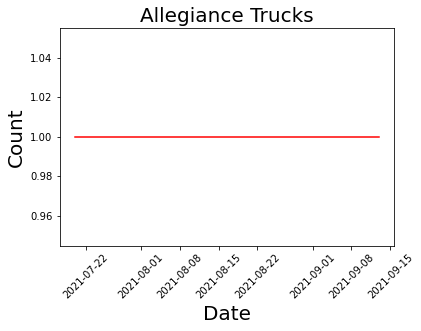

Bergey's Trucks, Inc.


C:\Users\asoka\AppData\Local\Temp\ipykernel_15300\773280877.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df["date"]=pd.to_datetime(rslt_df['year'].astype(str)+'-'+rslt_df["month"].astype(str)+'-'+rslt_df["day"].astype(str),yearfirst=True)


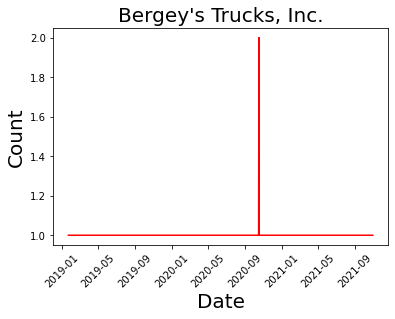

C:\Users\asoka\AppData\Local\Temp\ipykernel_15300\773280877.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df["date"]=pd.to_datetime(rslt_df['year'].astype(str)+'-'+rslt_df["month"].astype(str)+'-'+rslt_df["day"].astype(str),yearfirst=True)


Brody Transportation


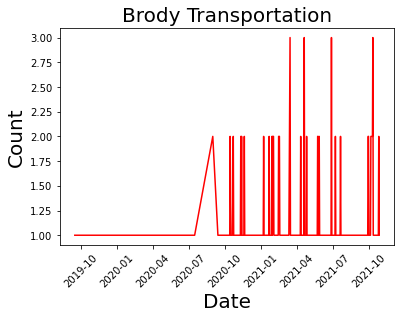

Excel Trailer / Truck Location


C:\Users\asoka\AppData\Local\Temp\ipykernel_15300\773280877.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df["date"]=pd.to_datetime(rslt_df['year'].astype(str)+'-'+rslt_df["month"].astype(str)+'-'+rslt_df["day"].astype(str),yearfirst=True)


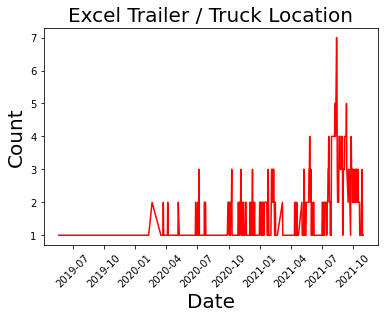

Excel Trailer


C:\Users\asoka\AppData\Local\Temp\ipykernel_15300\773280877.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df["date"]=pd.to_datetime(rslt_df['year'].astype(str)+'-'+rslt_df["month"].astype(str)+'-'+rslt_df["day"].astype(str),yearfirst=True)


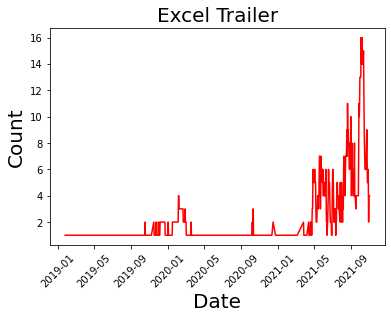

Excel Trailer


C:\Users\asoka\AppData\Local\Temp\ipykernel_15300\773280877.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df["date"]=pd.to_datetime(rslt_df['year'].astype(str)+'-'+rslt_df["month"].astype(str)+'-'+rslt_df["day"].astype(str),yearfirst=True)


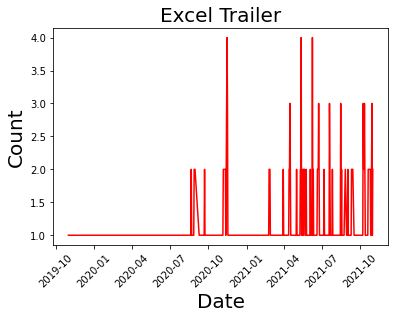

Fleetco Inc.


C:\Users\asoka\AppData\Local\Temp\ipykernel_15300\773280877.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df["date"]=pd.to_datetime(rslt_df['year'].astype(str)+'-'+rslt_df["month"].astype(str)+'-'+rslt_df["day"].astype(str),yearfirst=True)


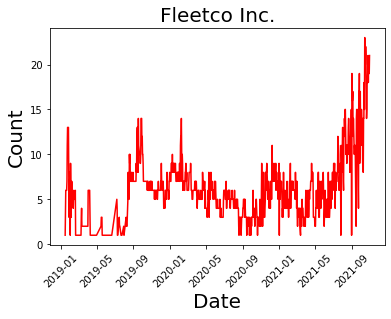

Fleetstop Trailers Ltd.


C:\Users\asoka\AppData\Local\Temp\ipykernel_15300\773280877.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df["date"]=pd.to_datetime(rslt_df['year'].astype(str)+'-'+rslt_df["month"].astype(str)+'-'+rslt_df["day"].astype(str),yearfirst=True)


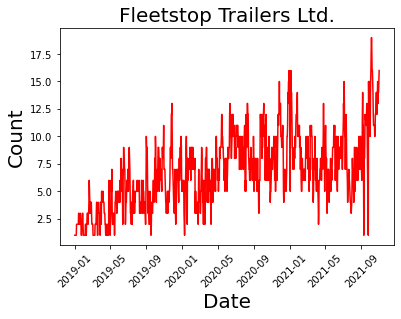

Gulf City Body & Trailer Works


C:\Users\asoka\AppData\Local\Temp\ipykernel_15300\773280877.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df["date"]=pd.to_datetime(rslt_df['year'].astype(str)+'-'+rslt_df["month"].astype(str)+'-'+rslt_df["day"].astype(str),yearfirst=True)


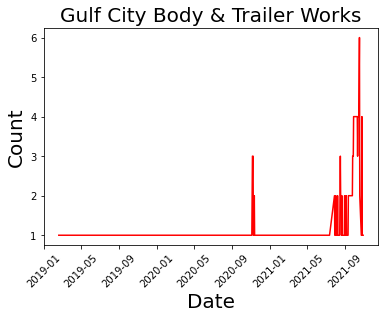

C:\Users\asoka\AppData\Local\Temp\ipykernel_15300\773280877.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df["date"]=pd.to_datetime(rslt_df['year'].astype(str)+'-'+rslt_df["month"].astype(str)+'-'+rslt_df["day"].astype(str),yearfirst=True)


Gulf City Body & Trailer Works


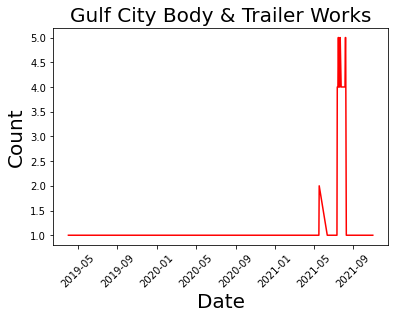

C:\Users\asoka\AppData\Local\Temp\ipykernel_15300\773280877.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df["date"]=pd.to_datetime(rslt_df['year'].astype(str)+'-'+rslt_df["month"].astype(str)+'-'+rslt_df["day"].astype(str),yearfirst=True)


Jackson Truck and Trailer


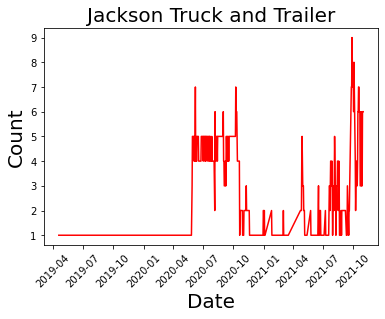

M&K Trailer Centers


C:\Users\asoka\AppData\Local\Temp\ipykernel_15300\773280877.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df["date"]=pd.to_datetime(rslt_df['year'].astype(str)+'-'+rslt_df["month"].astype(str)+'-'+rslt_df["day"].astype(str),yearfirst=True)


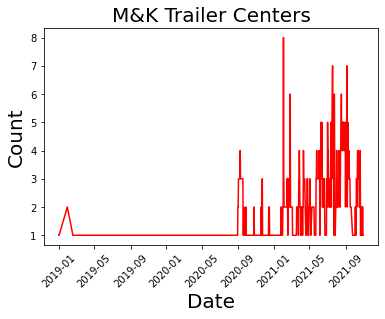

Midwest Trailer Sales


C:\Users\asoka\AppData\Local\Temp\ipykernel_15300\773280877.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df["date"]=pd.to_datetime(rslt_df['year'].astype(str)+'-'+rslt_df["month"].astype(str)+'-'+rslt_df["day"].astype(str),yearfirst=True)


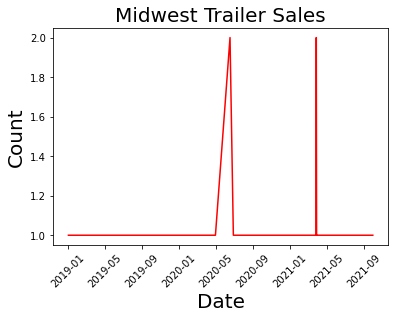

Peak Trailer Group - Dallas

C:\Users\asoka\AppData\Local\Temp\ipykernel_15300\773280877.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df["date"]=pd.to_datetime(rslt_df['year'].astype(str)+'-'+rslt_df["month"].astype(str)+'-'+rslt_df["day"].astype(str),yearfirst=True)


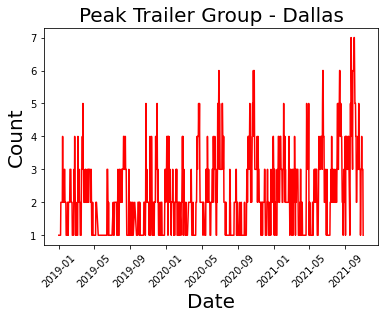

Peak Trailer Group - El Paso


C:\Users\asoka\AppData\Local\Temp\ipykernel_15300\773280877.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df["date"]=pd.to_datetime(rslt_df['year'].astype(str)+'-'+rslt_df["month"].astype(str)+'-'+rslt_df["day"].astype(str),yearfirst=True)


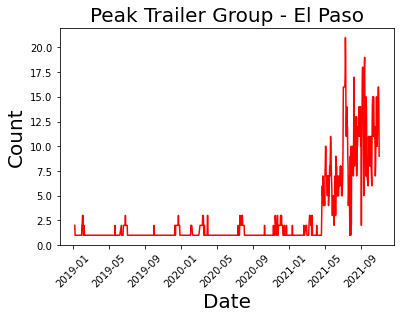

Peak Trailer Group - San Antonio


C:\Users\asoka\AppData\Local\Temp\ipykernel_15300\773280877.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df["date"]=pd.to_datetime(rslt_df['year'].astype(str)+'-'+rslt_df["month"].astype(str)+'-'+rslt_df["day"].astype(str),yearfirst=True)


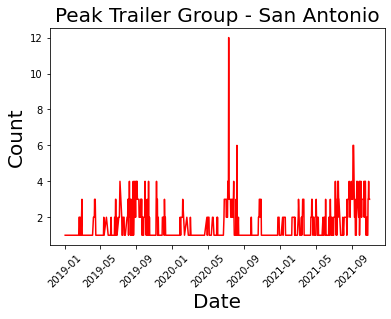

Quality Trailer Sales Inc


C:\Users\asoka\AppData\Local\Temp\ipykernel_15300\773280877.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df["date"]=pd.to_datetime(rslt_df['year'].astype(str)+'-'+rslt_df["month"].astype(str)+'-'+rslt_df["day"].astype(str),yearfirst=True)


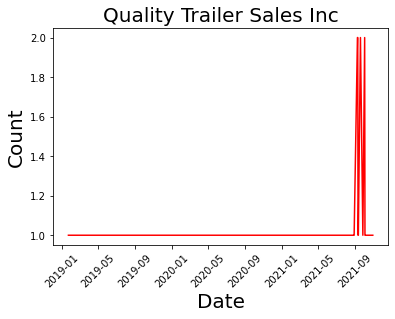

C:\Users\asoka\AppData\Local\Temp\ipykernel_15300\773280877.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df["date"]=pd.to_datetime(rslt_df['year'].astype(str)+'-'+rslt_df["month"].astype(str)+'-'+rslt_df["day"].astype(str),yearfirst=True)


Quality Trailer Sales Inc


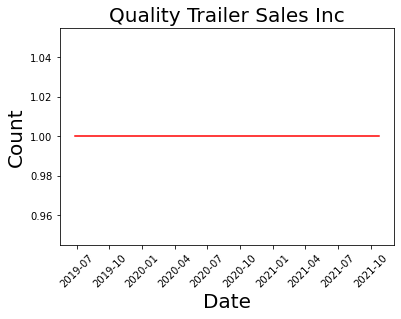

Quality Trailer Sales Inc


C:\Users\asoka\AppData\Local\Temp\ipykernel_15300\773280877.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df["date"]=pd.to_datetime(rslt_df['year'].astype(str)+'-'+rslt_df["month"].astype(str)+'-'+rslt_df["day"].astype(str),yearfirst=True)


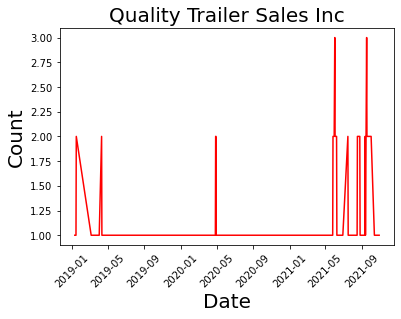

Regional International- Rochester


C:\Users\asoka\AppData\Local\Temp\ipykernel_15300\773280877.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df["date"]=pd.to_datetime(rslt_df['year'].astype(str)+'-'+rslt_df["month"].astype(str)+'-'+rslt_df["day"].astype(str),yearfirst=True)


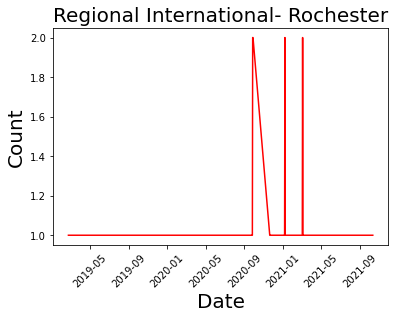

Regional International - Geneva


C:\Users\asoka\AppData\Local\Temp\ipykernel_15300\773280877.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df["date"]=pd.to_datetime(rslt_df['year'].astype(str)+'-'+rslt_df["month"].astype(str)+'-'+rslt_df["day"].astype(str),yearfirst=True)


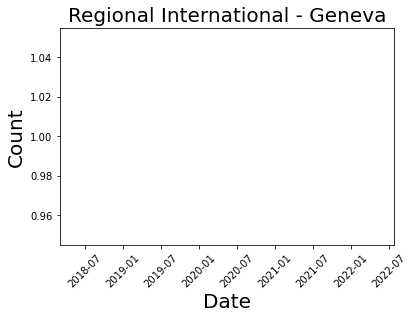

Regional International- Buffalo


C:\Users\asoka\AppData\Local\Temp\ipykernel_15300\773280877.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df["date"]=pd.to_datetime(rslt_df['year'].astype(str)+'-'+rslt_df["month"].astype(str)+'-'+rslt_df["day"].astype(str),yearfirst=True)


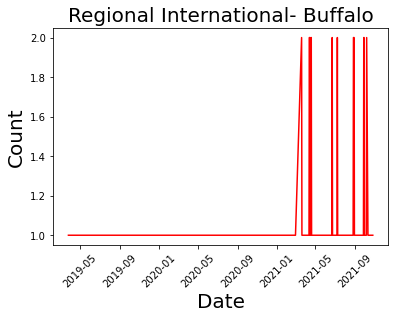

C:\Users\asoka\AppData\Local\Temp\ipykernel_15300\773280877.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df["date"]=pd.to_datetime(rslt_df['year'].astype(str)+'-'+rslt_df["month"].astype(str)+'-'+rslt_df["day"].astype(str),yearfirst=True)


River-Roads Sales & Leasing


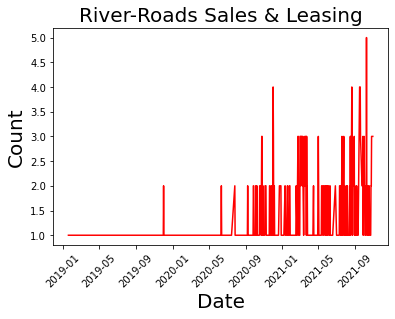

Southland International


C:\Users\asoka\AppData\Local\Temp\ipykernel_15300\773280877.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df["date"]=pd.to_datetime(rslt_df['year'].astype(str)+'-'+rslt_df["month"].astype(str)+'-'+rslt_df["day"].astype(str),yearfirst=True)


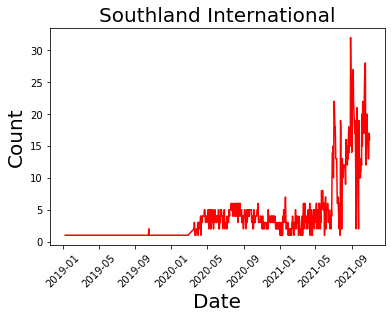

Southland International


C:\Users\asoka\AppData\Local\Temp\ipykernel_15300\773280877.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df["date"]=pd.to_datetime(rslt_df['year'].astype(str)+'-'+rslt_df["month"].astype(str)+'-'+rslt_df["day"].astype(str),yearfirst=True)


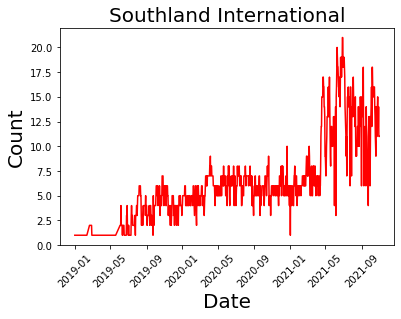

Southland International


C:\Users\asoka\AppData\Local\Temp\ipykernel_15300\773280877.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df["date"]=pd.to_datetime(rslt_df['year'].astype(str)+'-'+rslt_df["month"].astype(str)+'-'+rslt_df["day"].astype(str),yearfirst=True)


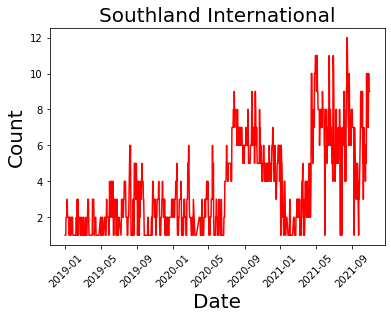

TEC Equipment


C:\Users\asoka\AppData\Local\Temp\ipykernel_15300\773280877.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df["date"]=pd.to_datetime(rslt_df['year'].astype(str)+'-'+rslt_df["month"].astype(str)+'-'+rslt_df["day"].astype(str),yearfirst=True)


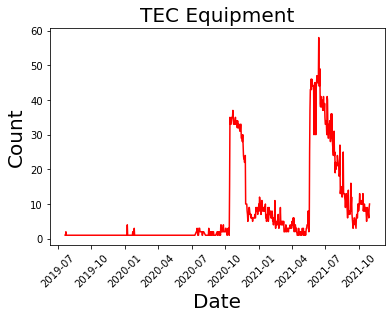

TEC Equipment


C:\Users\asoka\AppData\Local\Temp\ipykernel_15300\773280877.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df["date"]=pd.to_datetime(rslt_df['year'].astype(str)+'-'+rslt_df["month"].astype(str)+'-'+rslt_df["day"].astype(str),yearfirst=True)


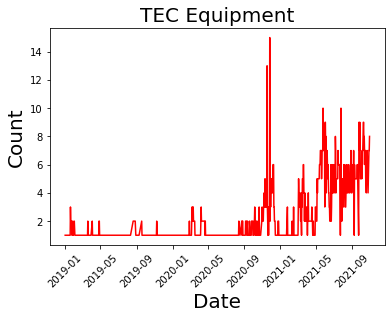

TEC Equipment


C:\Users\asoka\AppData\Local\Temp\ipykernel_15300\773280877.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df["date"]=pd.to_datetime(rslt_df['year'].astype(str)+'-'+rslt_df["month"].astype(str)+'-'+rslt_df["day"].astype(str),yearfirst=True)


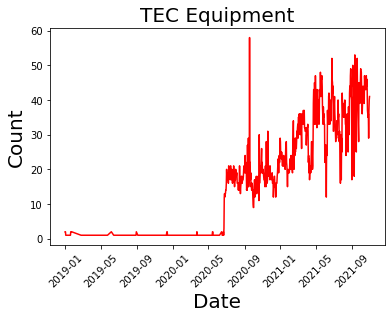

TEC Equipment


C:\Users\asoka\AppData\Local\Temp\ipykernel_15300\773280877.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df["date"]=pd.to_datetime(rslt_df['year'].astype(str)+'-'+rslt_df["month"].astype(str)+'-'+rslt_df["day"].astype(str),yearfirst=True)


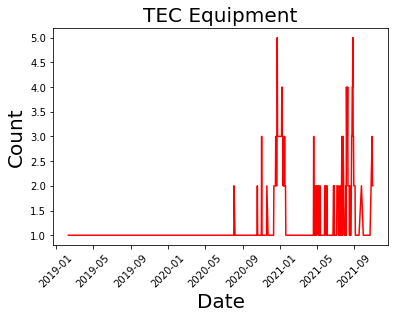

TEC Equipment


C:\Users\asoka\AppData\Local\Temp\ipykernel_15300\773280877.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df["date"]=pd.to_datetime(rslt_df['year'].astype(str)+'-'+rslt_df["month"].astype(str)+'-'+rslt_df["day"].astype(str),yearfirst=True)


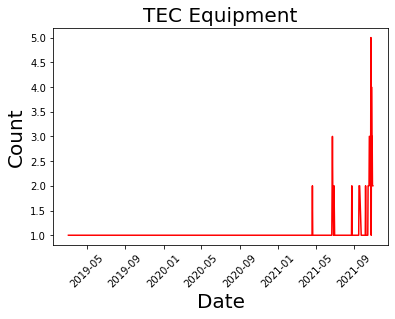

TEC Equipment


C:\Users\asoka\AppData\Local\Temp\ipykernel_15300\773280877.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df["date"]=pd.to_datetime(rslt_df['year'].astype(str)+'-'+rslt_df["month"].astype(str)+'-'+rslt_df["day"].astype(str),yearfirst=True)


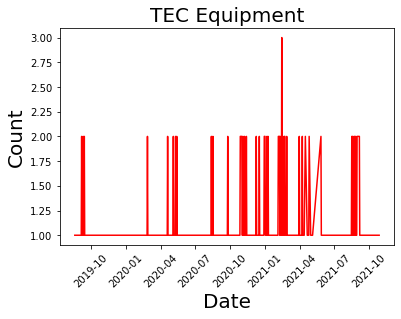

TEC Equipment


C:\Users\asoka\AppData\Local\Temp\ipykernel_15300\773280877.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df["date"]=pd.to_datetime(rslt_df['year'].astype(str)+'-'+rslt_df["month"].astype(str)+'-'+rslt_df["day"].astype(str),yearfirst=True)


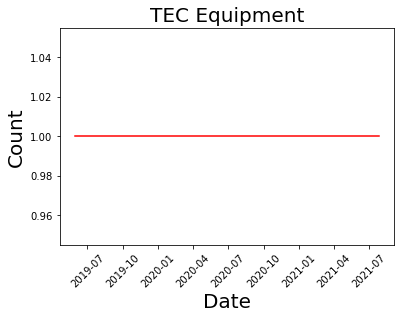

C:\Users\asoka\AppData\Local\Temp\ipykernel_15300\773280877.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df["date"]=pd.to_datetime(rslt_df['year'].astype(str)+'-'+rslt_df["month"].astype(str)+'-'+rslt_df["day"].astype(str),yearfirst=True)


TEC Equipment


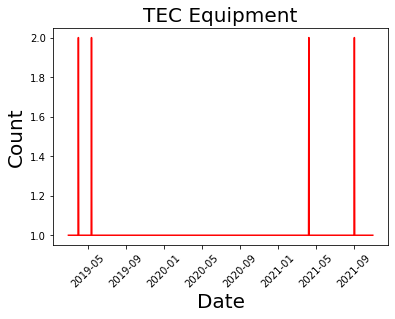

TEC Equipment


C:\Users\asoka\AppData\Local\Temp\ipykernel_15300\773280877.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df["date"]=pd.to_datetime(rslt_df['year'].astype(str)+'-'+rslt_df["month"].astype(str)+'-'+rslt_df["day"].astype(str),yearfirst=True)


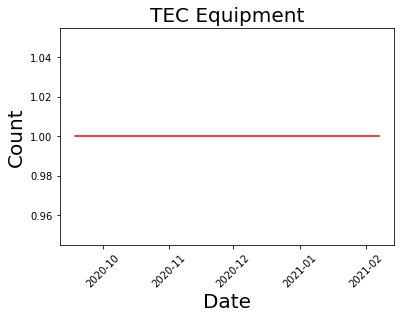

Truck Country of Indiana dba Stoops Freightliner


C:\Users\asoka\AppData\Local\Temp\ipykernel_15300\773280877.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df["date"]=pd.to_datetime(rslt_df['year'].astype(str)+'-'+rslt_df["month"].astype(str)+'-'+rslt_df["day"].astype(str),yearfirst=True)


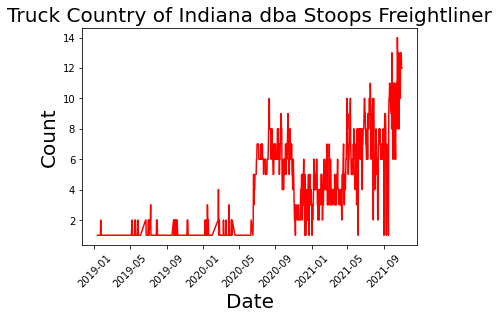

Truck Country of Indiana dba Stoops Freightliner


C:\Users\asoka\AppData\Local\Temp\ipykernel_15300\773280877.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df["date"]=pd.to_datetime(rslt_df['year'].astype(str)+'-'+rslt_df["month"].astype(str)+'-'+rslt_df["day"].astype(str),yearfirst=True)


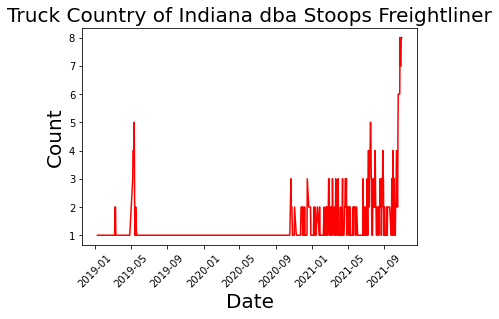

Truck Country of Indiana dba Stoops Freightliner


C:\Users\asoka\AppData\Local\Temp\ipykernel_15300\773280877.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df["date"]=pd.to_datetime(rslt_df['year'].astype(str)+'-'+rslt_df["month"].astype(str)+'-'+rslt_df["day"].astype(str),yearfirst=True)


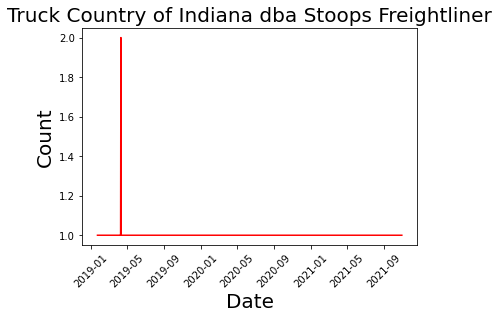

Truck Country of Indiana dba Stoops Freightliner


C:\Users\asoka\AppData\Local\Temp\ipykernel_15300\773280877.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df["date"]=pd.to_datetime(rslt_df['year'].astype(str)+'-'+rslt_df["month"].astype(str)+'-'+rslt_df["day"].astype(str),yearfirst=True)


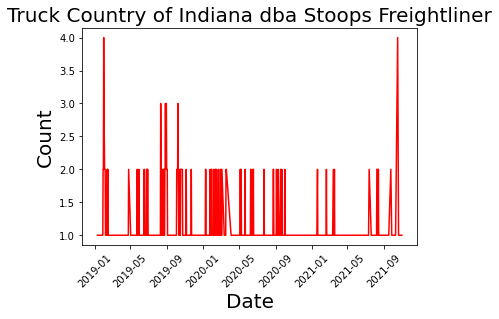

Truck Country of Indiana dba Stoops Freightliner


C:\Users\asoka\AppData\Local\Temp\ipykernel_15300\773280877.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df["date"]=pd.to_datetime(rslt_df['year'].astype(str)+'-'+rslt_df["month"].astype(str)+'-'+rslt_df["day"].astype(str),yearfirst=True)


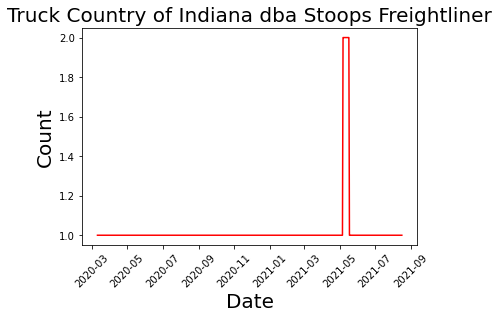

C:\Users\asoka\AppData\Local\Temp\ipykernel_15300\773280877.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df["date"]=pd.to_datetime(rslt_df['year'].astype(str)+'-'+rslt_df["month"].astype(str)+'-'+rslt_df["day"].astype(str),yearfirst=True)


Truck Country of Indiana dba Stoops Freightliner


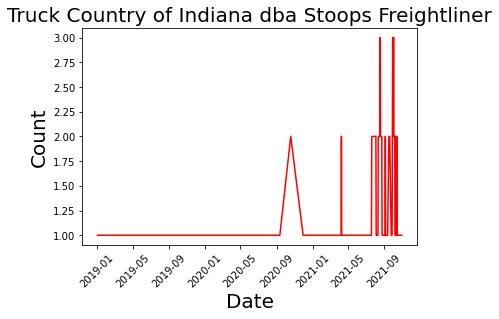

Truck Trailer & Equipment


C:\Users\asoka\AppData\Local\Temp\ipykernel_15300\773280877.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df["date"]=pd.to_datetime(rslt_df['year'].astype(str)+'-'+rslt_df["month"].astype(str)+'-'+rslt_df["day"].astype(str),yearfirst=True)


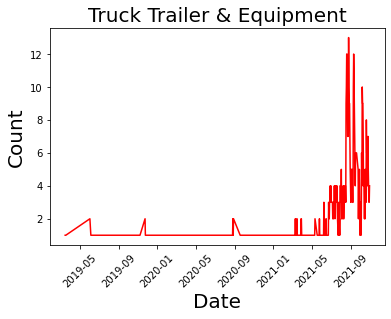

Twin State Trailers


C:\Users\asoka\AppData\Local\Temp\ipykernel_15300\773280877.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df["date"]=pd.to_datetime(rslt_df['year'].astype(str)+'-'+rslt_df["month"].astype(str)+'-'+rslt_df["day"].astype(str),yearfirst=True)


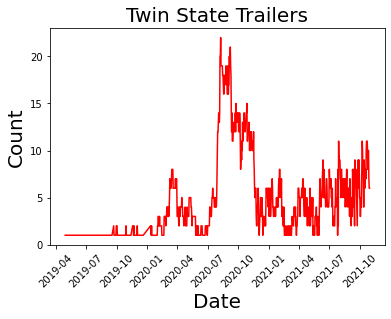

Twin State Trailers


C:\Users\asoka\AppData\Local\Temp\ipykernel_15300\773280877.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df["date"]=pd.to_datetime(rslt_df['year'].astype(str)+'-'+rslt_df["month"].astype(str)+'-'+rslt_df["day"].astype(str),yearfirst=True)


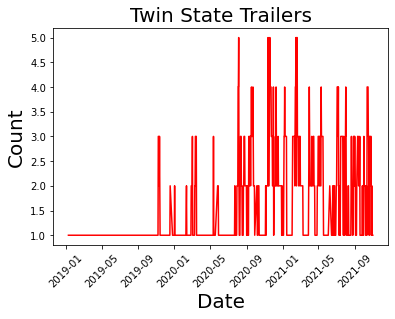

Twin State Trailers/Wabash of FL


C:\Users\asoka\AppData\Local\Temp\ipykernel_15300\773280877.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df["date"]=pd.to_datetime(rslt_df['year'].astype(str)+'-'+rslt_df["month"].astype(str)+'-'+rslt_df["day"].astype(str),yearfirst=True)


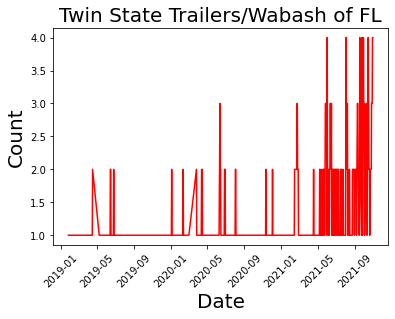

Twin State Trailers/Wabash of FL


C:\Users\asoka\AppData\Local\Temp\ipykernel_15300\773280877.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df["date"]=pd.to_datetime(rslt_df['year'].astype(str)+'-'+rslt_df["month"].astype(str)+'-'+rslt_df["day"].astype(str),yearfirst=True)


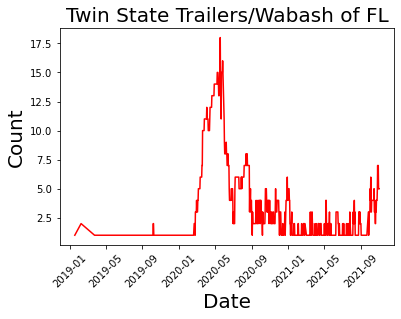

Wick's Truck Trailers Inc.


C:\Users\asoka\AppData\Local\Temp\ipykernel_15300\773280877.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df["date"]=pd.to_datetime(rslt_df['year'].astype(str)+'-'+rslt_df["month"].astype(str)+'-'+rslt_df["day"].astype(str),yearfirst=True)


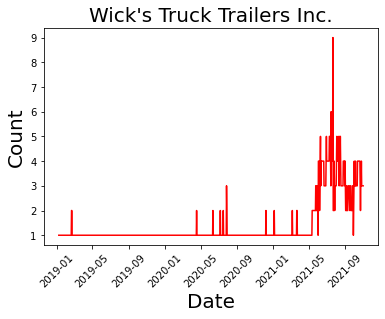

Wick's Truck Trailers Inc.


C:\Users\asoka\AppData\Local\Temp\ipykernel_15300\773280877.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df["date"]=pd.to_datetime(rslt_df['year'].astype(str)+'-'+rslt_df["month"].astype(str)+'-'+rslt_df["day"].astype(str),yearfirst=True)


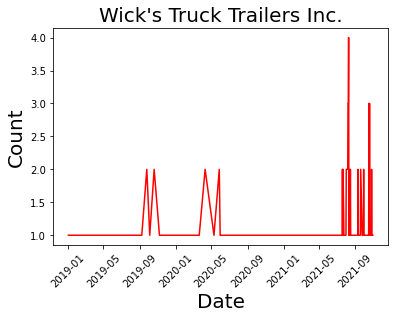

C:\Users\asoka\AppData\Local\Temp\ipykernel_15300\773280877.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df["date"]=pd.to_datetime(rslt_df['year'].astype(str)+'-'+rslt_df["month"].astype(str)+'-'+rslt_df["day"].astype(str),yearfirst=True)


WTS Services LLC


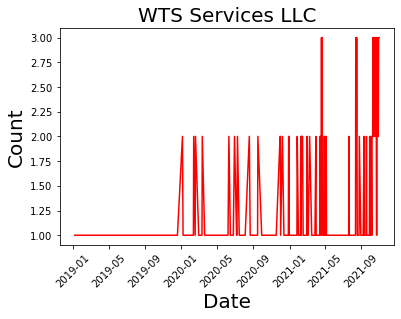

In [78]:
#resolved timestamp issue
x=0.100
import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib.backends
#creating a geofence
for index in distribution_center.index:
    print(distribution_center.loc[index,'loc_name'])
    rslt_df=wabash_pandas3.loc[(wabash_pandas3.latitude<distribution_center.loc[index,'latitude']+x) & (wabash_pandas3.latitude>distribution_center.loc[index,'latitude']-x) & (wabash_pandas3.longitude<distribution_center.loc[index,'longitude']+x) & (wabash_pandas3.longitude>distribution_center.loc[index,'longitude']-x)]
    distribution_center.loc[index,'truck_count']= len(rslt_df.index)
    rslt_df["date"]=pd.to_datetime(rslt_df['year'].astype(str)+'-'+rslt_df["month"].astype(str)+'-'+rslt_df["day"].astype(str),yearfirst=True)
    date_list=[]
    value_counts=[]
    for date in rslt_df['date']:
        date_list.append(date)
        value_counts.append(rslt_df['date'].value_counts()[date])
   
    plt.plot(date_list, value_counts, color='red')
  
    
    plt.title(distribution_center.loc[index,'loc_name'], size='20')
    plt.xlabel("Date", size = '20')
    #rotating x labels to avoid overlap and for presentation.
    plt.xticks(rotation = 45)
    plt.ylabel("Count", size = '20')
    plt.show()
    
#     print(rslt_df['month'].value_counts())
    distribution_center.loc[index,'truck_count']= len(rslt_df.index)

In [86]:
distribution_center

,loc_name,address,location,point,latitude,longitude,altitude,truck_count
1,Allegiance Trucks,"130 Market St,Fort Kent,ME,4743,US","(130, Market Street, Bradburys, Fort Kent Mill...","(47.25025565990624, -68.57855667893905, 0.0)",47.250256,-68.578557,0.0,0.0
2,Allegiance Trucks,"571 Coldbrook Rd,Hermon,ME,4401,US","(571, Coldbrook Road, Cold Brook, Hermon, Peno...","(44.77943625091508, -68.86812040739302, 0.0)",44.779436,-68.868120,0.0,0.0
3,"Bergey's Trucks, Inc.","7255 N Crescent Blvd,Pennsauken,NJ,8110,US","(7255, North Crescent Boulevard, Morrisville, ...","(39.9678731632653, -75.046089, 0.0)",39.967873,-75.046089,0.0,5.0
4,Brody Transportation,"621 S Bentalou St,Baltimore,MD,21223,US","(621, South Bentalou Street, Carrollton Ridge,...","(39.27943625, -76.65073530397436, 0.0)",39.279436,-76.650735,0.0,3.0
6,Excel Trailer / Truck Location,"405 Lee Hwy,Roanoke,VA,24019,US","(Lee Highway, Waterfall Lake, Hollins, Roanoke...","(37.3559095, -79.9294899, 0.0)",37.355910,-79.929490,0.0,41.0
8,Excel Trailer,"901 W Hundred Rd,Chester,VA,23836,US","(West Hundred Road, Dutch Gap, Chester, Cheste...","(37.3546859, -77.4087004, 0.0)",37.354686,-77.408700,0.0,7.0
10,Fleetco Inc.,"3003 Brick Church Pike,Nashville,TN,37207,US","(Brick Church Pike, Nashville-Davidson, Davids...","(36.2321016, -86.7814944, 0.0)",36.232102,-86.781494,0.0,1366.0
16,Fleetstop Trailers Ltd.,"1650 Oak Point Hwy,Winnipeg,MB,R3C 2E6,CA","(Oak Point Highway, Winnipeg, Manitoba, R2R 0V...","(49.9371699, -97.2241604, 0.0)",49.937170,-97.224160,0.0,1476.0
18,Gulf City Body & Trailer Works,"601 S Conception St,Mobile,AL,36603,US","(601, South Conception Street, Church Street H...","(30.677797, -88.042805, 0.0)",30.677797,-88.042805,0.0,14.0
19,Gulf City Body & Trailer Works,"5005 US 31,Calera,AL,35040,US","(5005, US 31, Pasqua, Calera, Shelby County, A...","(33.14879152842037, -86.7493137436969, 0.0)",33.148792,-86.749314,0.0,2.0


In [41]:
distribution_center.columns

Index(['Location_Name', 'address', 'location', 'point', 'latitude',
       'longitude', 'altitude'],
      dtype='object')